<a href="https://colab.research.google.com/github/gagan-iitb/DataAnalyticsAndVisualization/blob/main/Tutorial/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [20]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
# import some data to play with
iris = datasets.load_iris()
# Features are Sepal Length, Sepal Width, Petal Length and Petal Width

X = iris.data[:, :3]  # we only take the first two features.
y = iris.target



([], <a list of 0 Text major ticklabel objects>)

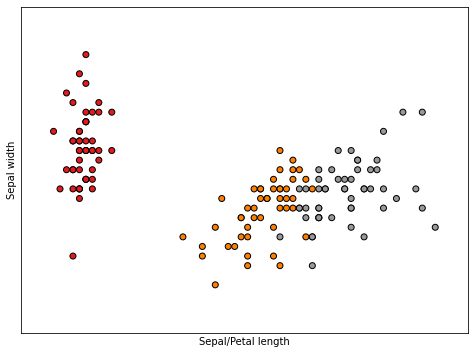

In [12]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 2], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal/Petal length")
plt.ylabel("Sepal width")

x1_min, x1_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xticks(())
plt.yticks(())

In [13]:
from vega_datasets import data
cars=data.cars()
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [17]:
cars.corr()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
Cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452
Displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984
Horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124
Weight_in_lbs,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086
Acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000


In [21]:
import seaborn as sns; sns.set_theme()

In [30]:
cars[['Acceleration','Miles_per_Gallon','Cylinders','Displacement']]

,Acceleration,Miles_per_Gallon,Cylinders,Displacement
0,12.0,18.0,8,307.0
1,11.5,15.0,8,350.0
2,11.0,18.0,8,318.0
3,12.0,16.0,8,304.0
4,10.5,17.0,8,302.0
...,...,...,...,...
401,15.6,27.0,4,140.0
402,24.6,44.0,4,97.0
403,11.6,32.0,4,135.0
404,18.6,28.0,4,120.0


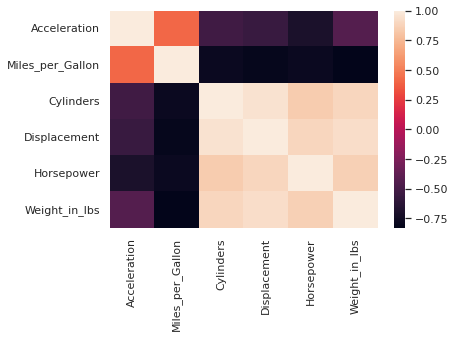

In [31]:
ax = sns.heatmap(cars[['Acceleration','Miles_per_Gallon', 'Cylinders', 'Displacement',	'Horsepower',	'Weight_in_lbs']].corr())

In [19]:
pd.scatter_matrix(cars)

AttributeError: ignored

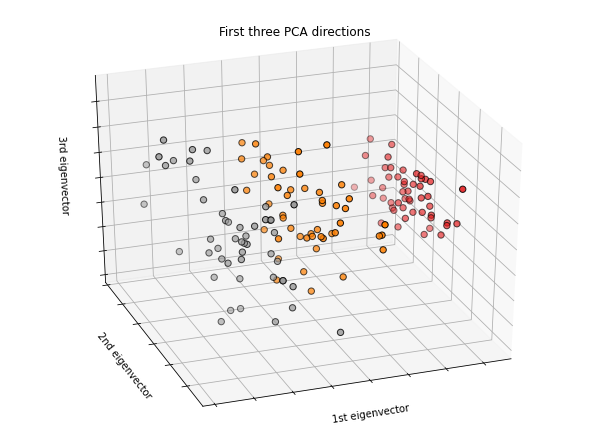

In [7]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()